In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [18]:
plt.rcParams["figure.figsize"] = (15, 10)

In [64]:
dense = defaultdict(lambda: 1e20)
sparse_coo = defaultdict(lambda: defaultdict(lambda: 1e20))
sparse_csr = defaultdict(lambda: defaultdict(lambda: 1e20))

In [65]:
for l in open("benches/results"):
    its = l.strip().split()
    if its[0] == 'sparse' and its[1] == 'coo':
        nl = int(its[2])
        bs = int(its[3])
        hs = int(its[4])
        nnz = int(its[5])
        timing = float(its[6])
        sparse_coo[(nl,bs,hs)][nnz] = min(timing, sparse_coo[(nl,bs,hs)][nnz])
    elif its[0] == 'sparse' and its[1] == 'csr':
        nl = int(its[2])
        bs = int(its[3])
        hs = int(its[4])
        nnz = int(its[5])
        timing = float(its[6])
        sparse_csr[(nl,bs,hs)][nnz] = min(timing, sparse_csr[(nl,bs,hs)][nnz])
    else:
        nl = int(its[2])
        bs = int(its[3])
        hs = int(its[4])
        timing = float(its[5])
        dense[(nl,bs,hs)] = min(timing, dense[(nl,bs,hs)])

No handles with labels found to put in legend.


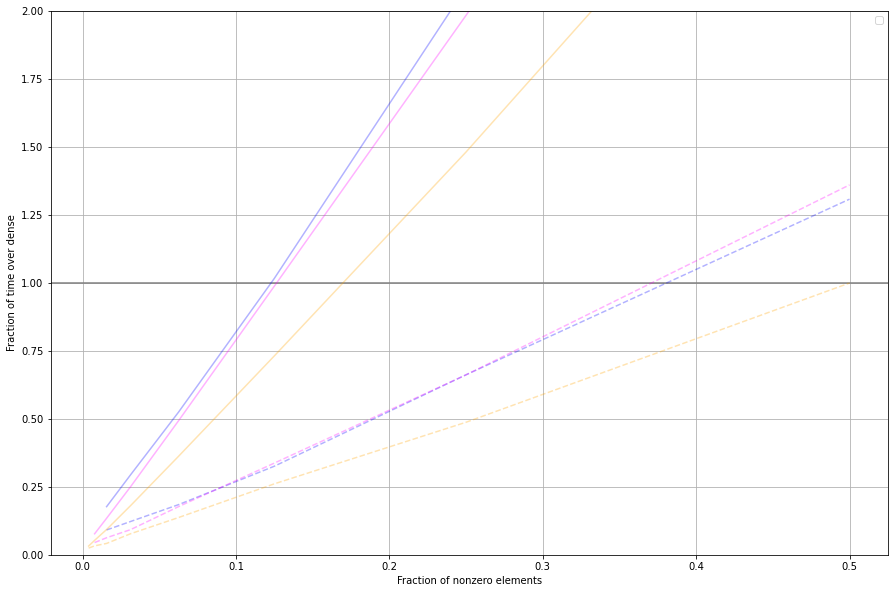

In [70]:
hscols = {
    32: "red",
    64: "green",
    128: "blue",
    256: "magenta",
    512: "orange"
}

plt.axhline(1, color="gray")

for k in dense:
    
    nl,bs,hs = k
    if nl != 6:
        continue
    if bs not in [16]:
        continue
    if hs not in [128, 256, 512]:
        continue
        
    
    
    x = []
    y = []
    for nnz in sparse_coo[k]:
        sparsity = nnz / (hs*hs)
        x.append(sparsity)
        y.append(sparse_coo[k][nnz] / dense[k])
    plt.plot(x, y, color=hscols[hs], alpha=0.3)
    
    x = []
    y = []
    for nnz in sparse_csr[k]:
        sparsity = nnz / (hs*hs)
        x.append(sparsity)
        y.append(sparse_csr[k][nnz] / dense[k])
    plt.plot(x, y, color=hscols[hs], alpha=0.3, linestyle='--')
    #print(k)
    #print(x, y, dense[k])
    #break
plt.ylim(0, 2.0)
plt.xlabel("Fraction of nonzero elements")
plt.ylabel("Fraction of time over dense")
plt.legend()
plt.grid()
